In [11]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [13]:
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype=tf.float32)
    #隐藏层
    h = tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)
    #输出层
    out = tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    #误差
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))
    
    saver = tf.train.Saver()

0.23144501


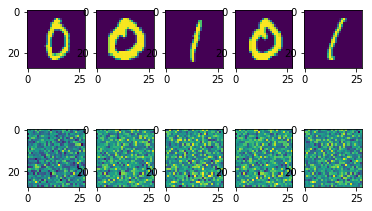

0.07152919


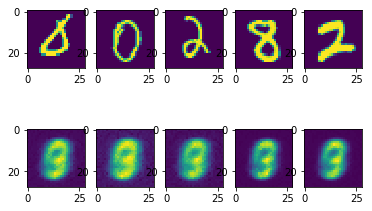

0.066867806


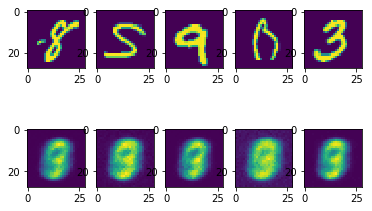

0.07166285


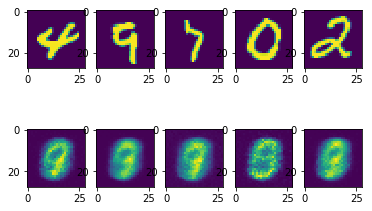

0.05738233


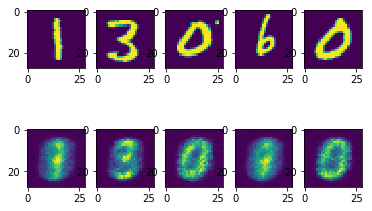

0.058057755


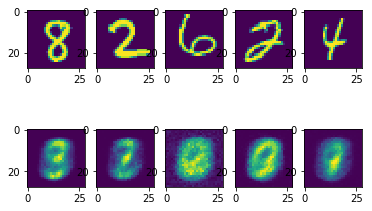

0.05065985


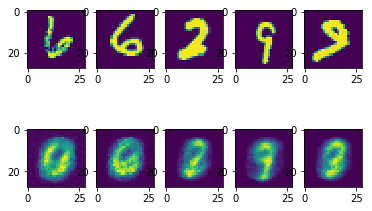

0.04220551


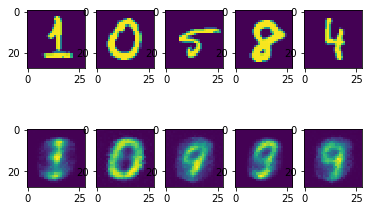

0.054519415


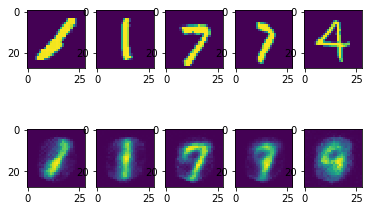

0.04552406


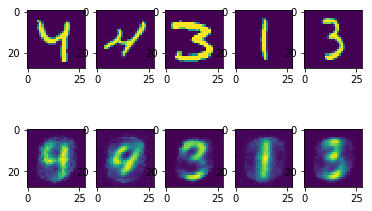

0.04592547


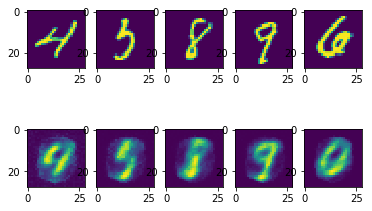

0.03958559


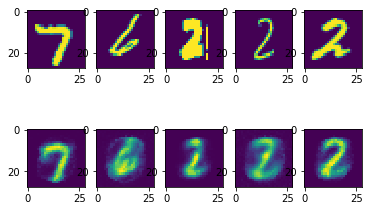

0.040202476


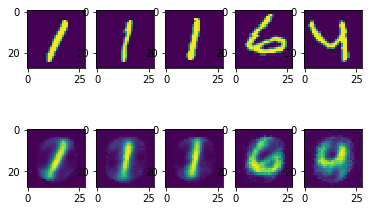

0.03768891


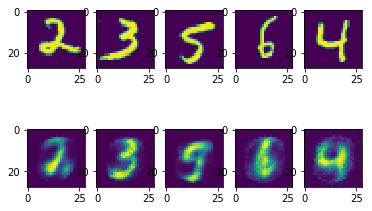

0.033420924


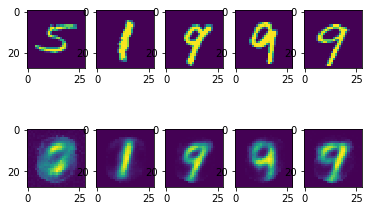

0.04014462


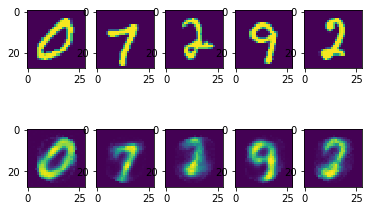

0.031359635


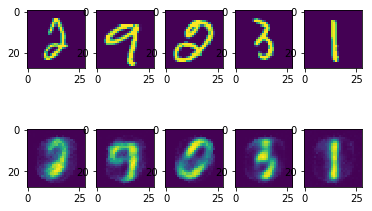

0.03834271


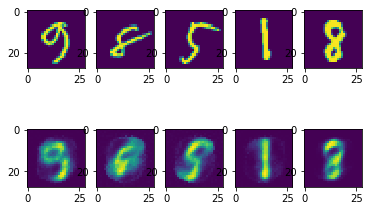

0.03565921


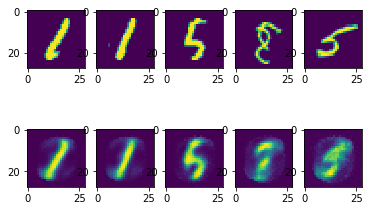

0.028732922


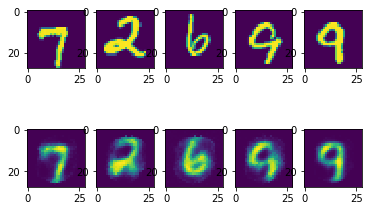

0.033758923


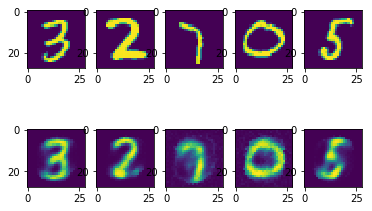

0.025515664


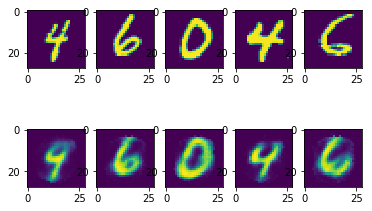

0.032501623


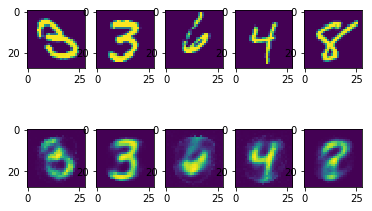

0.031201337


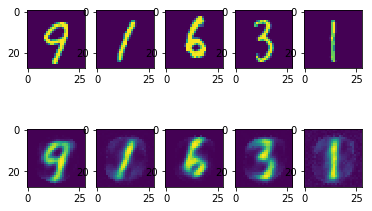

0.03192125


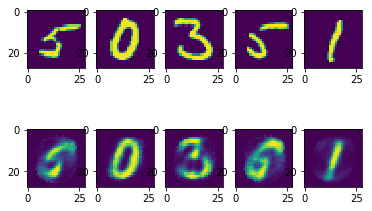

0.03287126


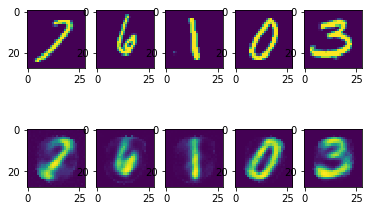

0.0277686


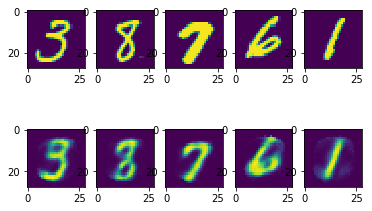

0.02763949


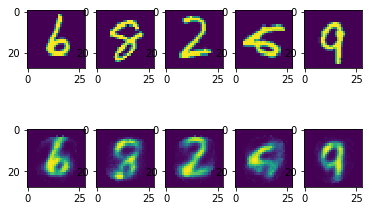

0.028159603


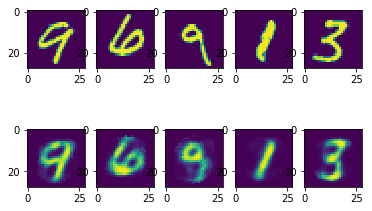

0.027063463


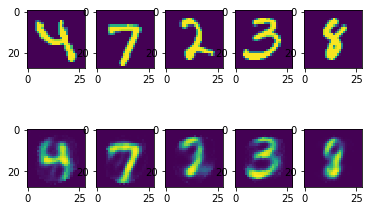

0.02567231


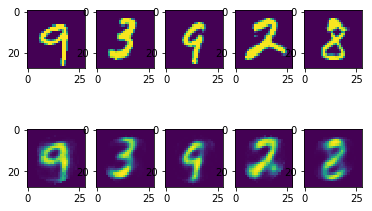

0.028526945


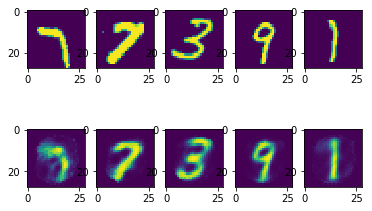

0.026877502


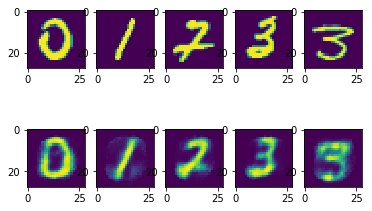

0.02684248


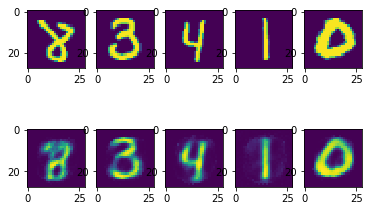

0.02193651


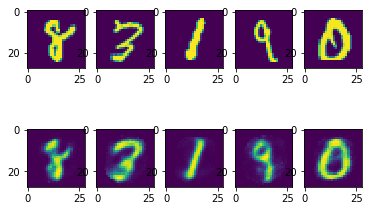

0.025315857


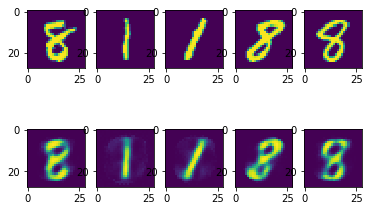

0.024724133


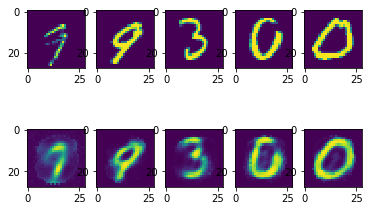

0.02365451


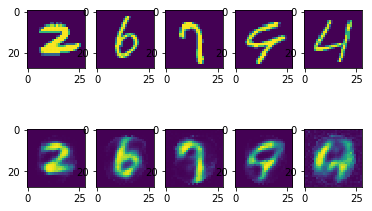

0.02491397


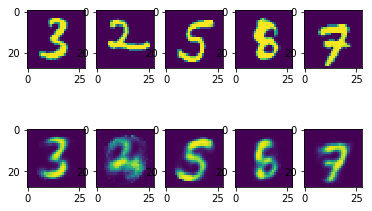

0.026357245


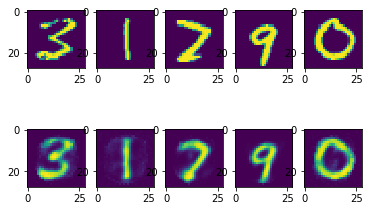

0.021965804


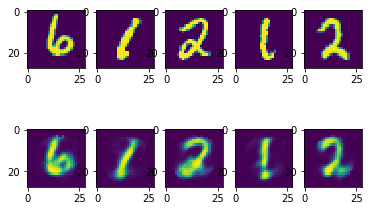

0.023215726


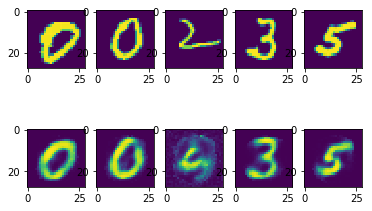

0.024190478


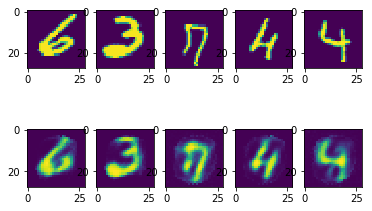

0.0221208


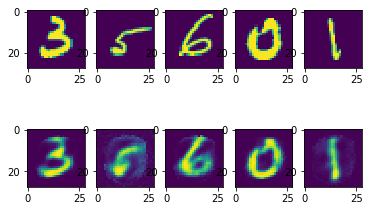

0.022083182


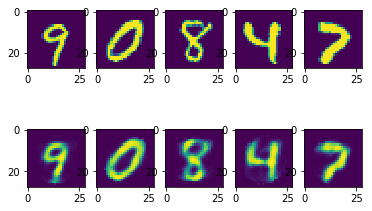

0.020883933


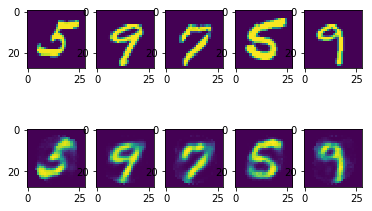

0.01853558


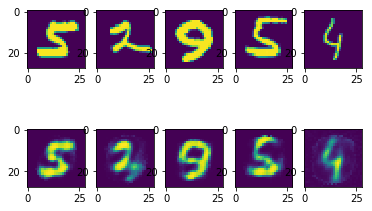

0.018161284


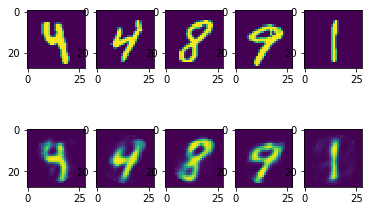

0.020766854


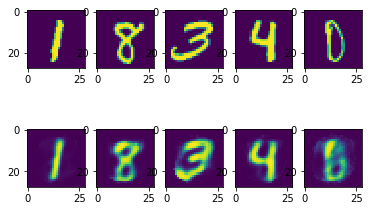

0.019728385


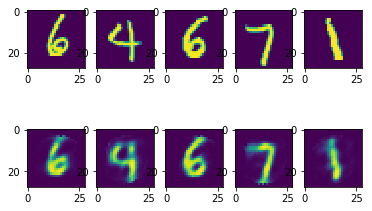

In [24]:
with tf.Session(graph=g) as sess:
    #梯度下降的优化器，声明学习率
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.3)
    #最小化代价
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    for i in range(50000):
        batch_img,_ = mnist.train.next_batch(32)
        res_loss,_ = sess.run([loss,train_op],feed_dict = {inp_out:batch_img})
        
        if i % 1000 == 0:
            print(res_loss)
            #5张图片可视化
            batch_img,_ = mnist.test.next_batch(5)
            res_out = sess.run(out,feed_dict = {inp_out:batch_img})
            for j in range(10):
                plt.subplot(2,5,j+1)
                #如果小于5，是bacth[j],如果不小于5就是res_out[j-5]
                img = batch_img[j] if j < 5 else res_out[j-5]
                plt.imshow((img*255).astype(np.uint8).reshape([28,28]))
            plt.show()